In [19]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

In [99]:
#pip install pystan
#conda install -c conda-forge fbprophet

In [21]:
dataset=pa.read_csv("C:/Users/91912/Downloads/FbProphet-master/FbProphet-master/airline_passengers.csv")

In [22]:
dataset

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


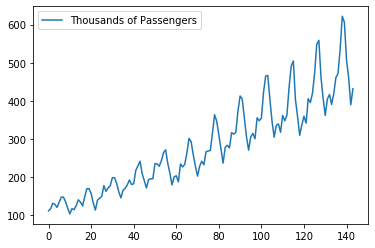

In [24]:
dataset.plot()
plt.show()

In [27]:
dataset.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [26]:
dataset.drop(144,inplace=True,axis=0)

In [28]:
dataset

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [29]:
dataset['Month']=pa.to_datetime(dataset['Month'])

In [30]:
dataset.dtypes

Month                      datetime64[ns]
Thousands of Passengers           float64
dtype: object

In [31]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [32]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [33]:
dataset.columns=['ds','y']
dataset.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [34]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [35]:
Pr=Prophet()

In [36]:
Pr.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
Pr.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [40]:
dataset.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [83]:
future_dataset=Pr.make_future_dataframe(periods=365,freq='D')

In [84]:
dataset.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [88]:
future_dataset.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [89]:
predict=Pr.predict(future_dataset)

In [90]:
predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.678663,469.747148,524.944747,520.204012,521.219747,-22.465788,-22.465788,-22.465788,-22.465788,-22.465788,-22.465788,0.0,0.0,0.0,498.212874
505,1961-11-28,520.779122,467.260227,526.207637,520.301764,521.323841,-24.088844,-24.088844,-24.088844,-24.088844,-24.088844,-24.088844,0.0,0.0,0.0,496.690278
506,1961-11-29,520.879581,465.909841,522.740606,520.399515,521.431993,-26.342491,-26.342491,-26.342491,-26.342491,-26.342491,-26.342491,0.0,0.0,0.0,494.537090
507,1961-11-30,520.980041,462.543855,521.743158,520.497266,521.540962,-29.182323,-29.182323,-29.182323,-29.182323,-29.182323,-29.182323,0.0,0.0,0.0,491.797718
508,1961-12-01,521.080500,459.603996,516.377681,520.594449,521.645047,-32.548774,-32.548774,-32.548774,-32.548774,-32.548774,-32.548774,0.0,0.0,0.0,488.531726


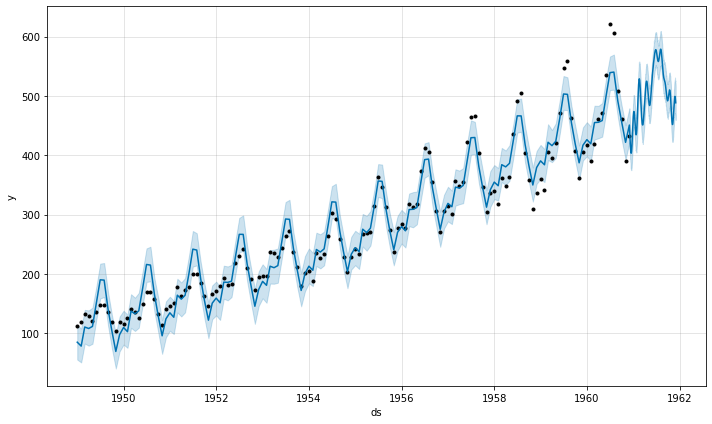

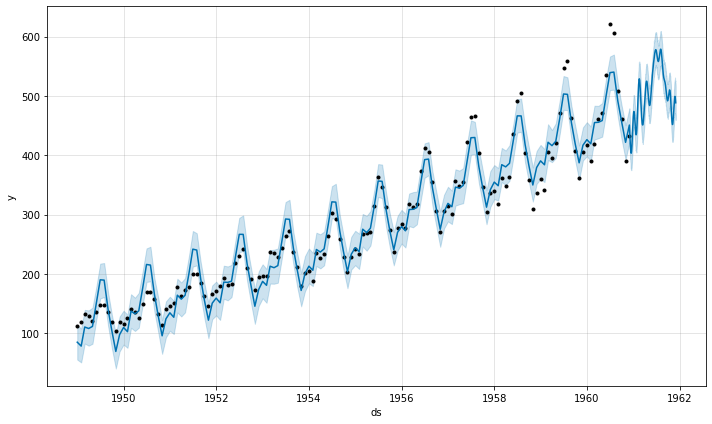

In [91]:
Pr.plot(predict)

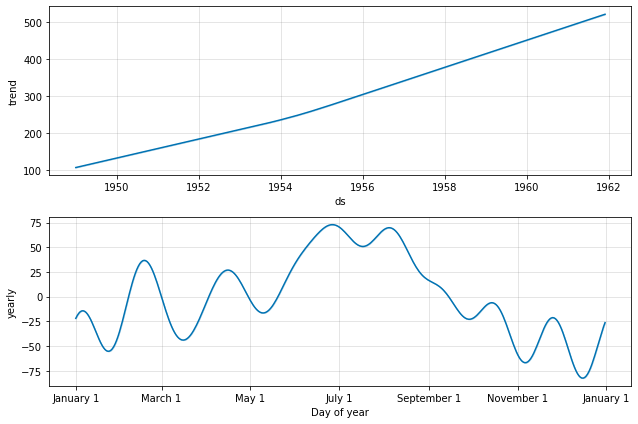

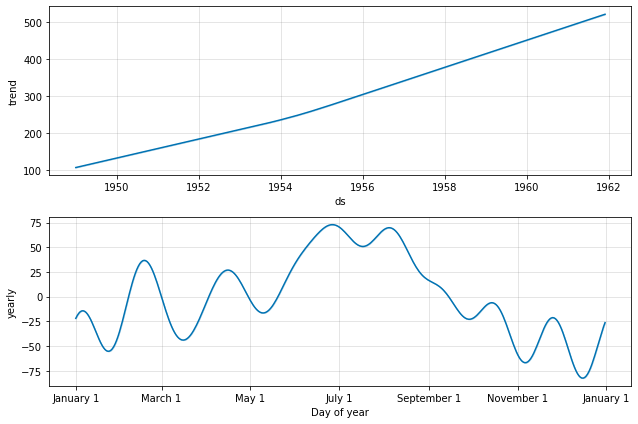

In [73]:
Pr.plot_components(predict)

In [92]:
from fbprophet.diagnostics import cross_validation

In [93]:
df_cv=cross_validation(Pr,horizon="365 days",period="180 days",initial="730 days")

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [94]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
223,1960-08-01,527.169942,502.579046,552.090500,606.0,1959-12-02
224,1960-09-01,485.991283,458.428961,511.917195,508.0,1959-12-02
225,1960-10-01,452.282405,428.704428,477.593757,461.0,1959-12-02
226,1960-11-01,422.463836,395.933147,447.579544,390.0,1959-12-02
227,1960-12-01,447.767981,420.401891,474.278828,432.0,1959-12-02


In [95]:
from fbprophet.diagnostics import performance_metrics

In [96]:
df_perform=performance_metrics(df_cv)

In [98]:
df_perform.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


In [100]:
from fbprophet.plot import plot_cross_validation_metric

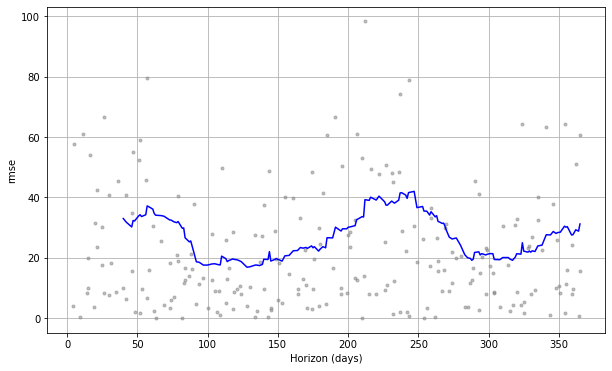

In [101]:
flg=plot_cross_validation_metric(df_cv,metric='rmse')